# Quantifying semisc similarity
## Chapter 031-Image-retrieval

### Author: Anders Kampenes

### Dimension reduction and visualization with PCA

In [ ]:
### Loading and preparing dataset

In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pylab as plt 
from sklearn.datasets import load_digits 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Path hack.
import sys, os
sys.path.insert(0, os.path.abspath('..'))
from scripts.data_utils.plots import scatter, visualize_scatter_with_images, plot_similar_image 
from scripts.data_utils.generators import SimilarityImageGenerator, generate_directional_dataset, flatten_directional_data

#load  seimsic data
chapterName = "031-Image-retrieval-UMAP"
prevChapterName = "02-data_sequence_analysis"
input_folder = "/Users/anderskampenes/Documents/Dokumenter/NTNU/MASTER/code/notebooks/" + prevChapterName
output_folder = "/Users/anderskampenes/Documents/Dokumenter/NTNU/MASTER/code/notebooks/" + chapterName
data_cube = np.load("/Users/anderskampenes/Documents/Dokumenter/NTNU/MASTER/code/data/processed/f3_entire_int8.npy")

print("img shape", data_cube.shape)

directions, inline_samples, xline_samples, tline_samples,data, labels, num_samples, shape = generate_directional_dataset(data_cube)
#print("labels", labels["inline"], labels["xline"], labels["tline"])


/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

img shape (651, 951, 462)
651 951 462


In [2]:
### Dimension reduction and visualization with UMAP


/usr/local/lib/python3.7/site-packages/umap/spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets


In [3]:
# flatten directions 
data = flatten_directional_data(data, num_samples)
print("flattten dirs", data["inline"].shape, data["xline"].shape, data["tline"].shape )


flattten dirs (651, 439362) (951, 300762) (462, 619101)


In [5]:
import umap

UMAP ={}
for dir in directions:
    reducer = umap.UMAP()
    filename = input_folder + "/UMAP_" + dir + ".npy"
    if not os.path.exists(filename):
        print("did not find data.. creating new...")
        UMAP[dir] = reducer.fit_transform(data[dir])
        # store the data 
        np.save(filename, UMAP[dir])
    else:
        print("found data. loading it to memory")
        UMAP[dir] = np.load(filename)




found data. loading it to memory
did not find data.. creating new...
did not find data.. creating new...


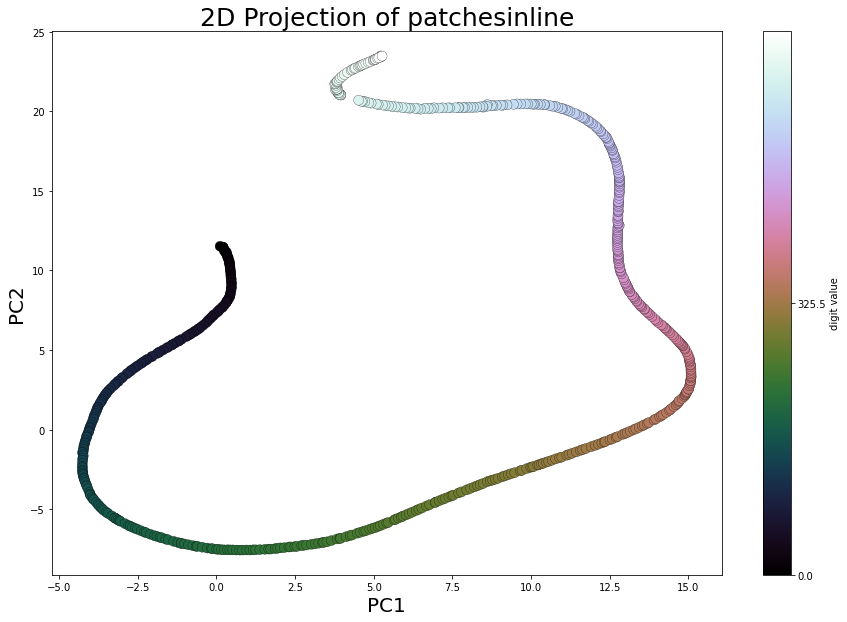

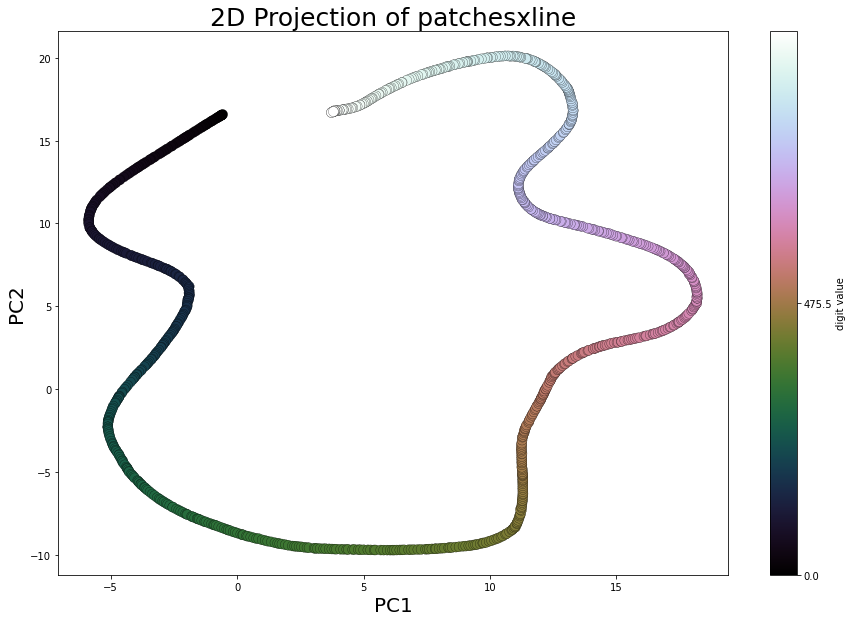

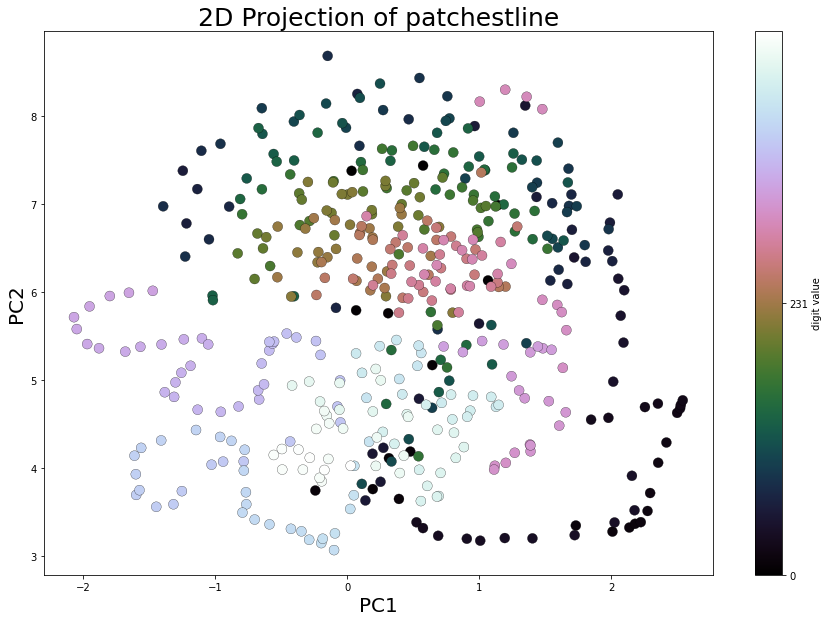

In [6]:
# scatter the different images with the original label     
for dir in directions:
    scatter(UMAP[dir], labels[dir], num_samples[dir], dir, show_labels=False)

    

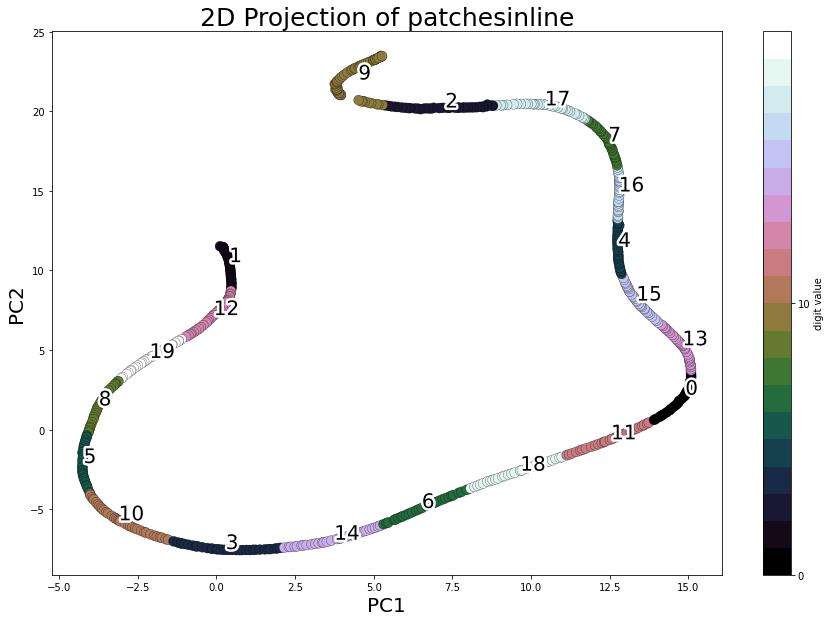

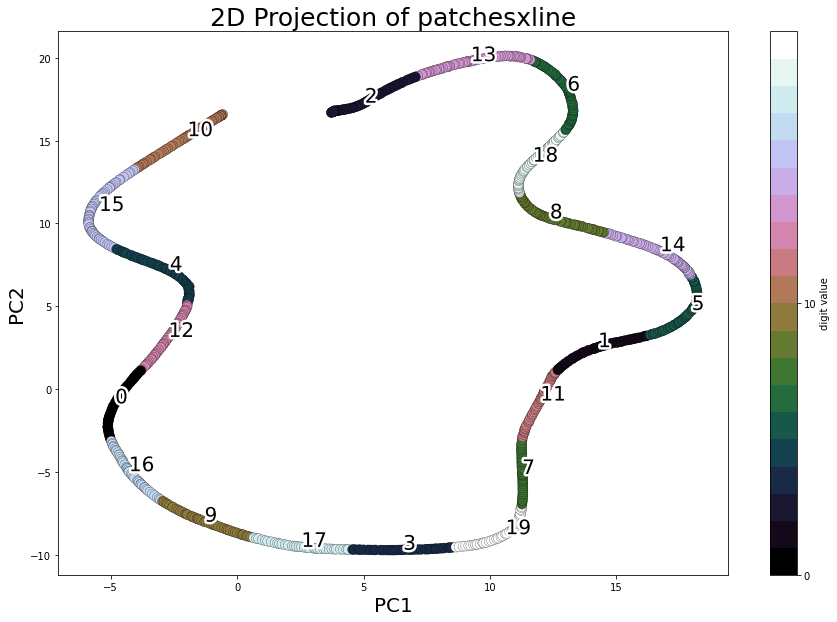

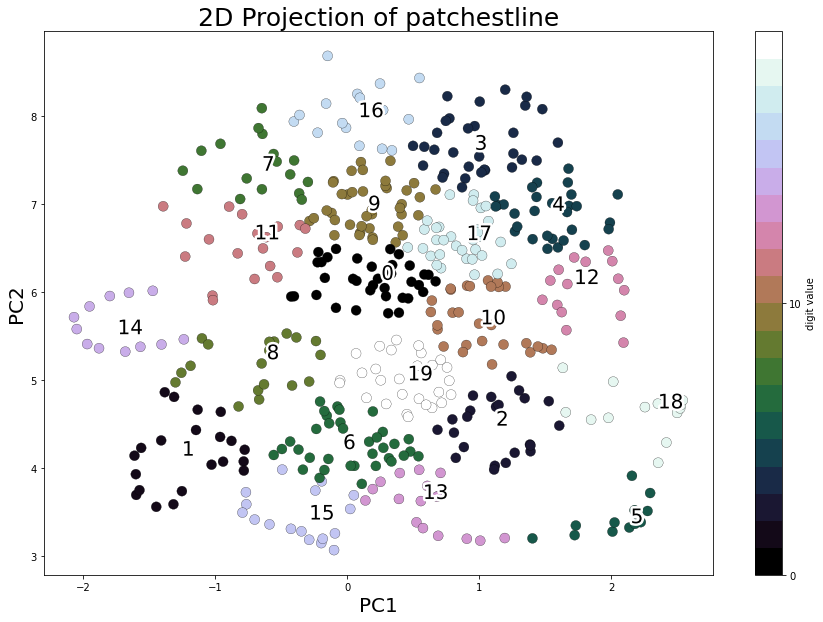

In [13]:
# perform k-means on each dir  to seperate into clusters?
from sklearn.cluster import KMeans

def perform_kmean(data,n_clusters):
    k_means = KMeans(n_clusters, random_state=0)
    k_means.fit(data)
    values = k_means.cluster_centers_.squeeze()
    labels_kmeans = k_means.labels_
    return k_means, values, labels_kmeans
n_clusters = 20

k_means= {}

for dir in directions:
    k_means[dir], values, labels_kmeans= perform_kmean(UMAP[dir],n_clusters)

    # plot 
    scatter(UMAP[dir], labels_kmeans, n_clusters, dir, output=output_folder +"/UMAP_kmeans_"+dir+"_"+str(n_clusters)+".png", show_labels=True)

In [14]:
 ## next we need to calculate the median of each cluster 
centers = {}
#print(k_means[dir].cluster_centers_.squeeze(), len(labels_kmeans))
for dir in directions:
    centers[dir] = []
    for i in range(n_clusters):
        x, y = np.median(UMAP[dir][k_means[dir].labels_ == i, :], axis=0)
        centers[dir].append((x, y, i))
        #print(dir,centers[dir][i])

In [15]:
# then we try to order the closest clusters to a given index 

def euclidean(coords):
    xx, yy,_ = ref
    x, y,_ = coords
    return ((x-xx)**2 + (y-yy)**2)**0.5

cluster_order = {}
for dir in directions:
    ref =centers[dir][0] # choose reference point to be cluster nr 0 
    print(ref)
    centers[dir].sort(key=euclidean)
    cluster_order[dir] = list(map(lambda x: x[-1], centers[dir]) )

    print(dir, cluster_order[dir])

(14.903989, 2.2016625, 0)
inline [0, 13, 11, 15, 18, 4, 6, 16, 14, 12, 7, 1, 19, 3, 8, 17, 2, 5, 10, 9]
(-4.827693, -0.8643152, 0)
xline [0, 16, 12, 9, 4, 17, 15, 3, 10, 7, 11, 19, 1, 8, 2, 18, 14, 5, 13, 6]
(0.2564251, 6.139463, 0)
tline [0, 17, 9, 10, 11, 19, 8, 12, 4, 7, 3, 16, 2, 6, 14, 1, 13, 18, 15, 5]


REF [[-2.3151233196258545, -7.3152689933776855, 9.0, 300.0]]
direction xline
treshold 50



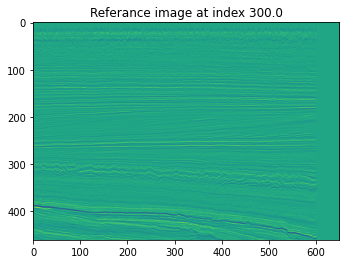

[538.0]

number left  950


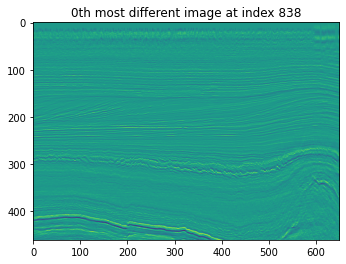

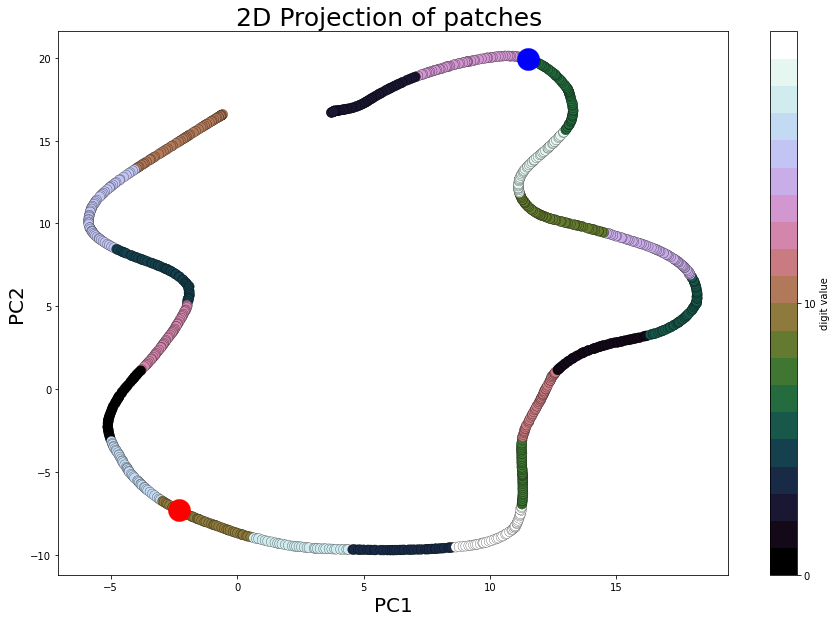

[125.0, 413.0]

number left  949


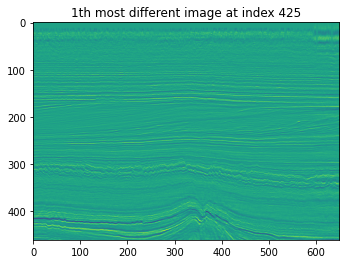

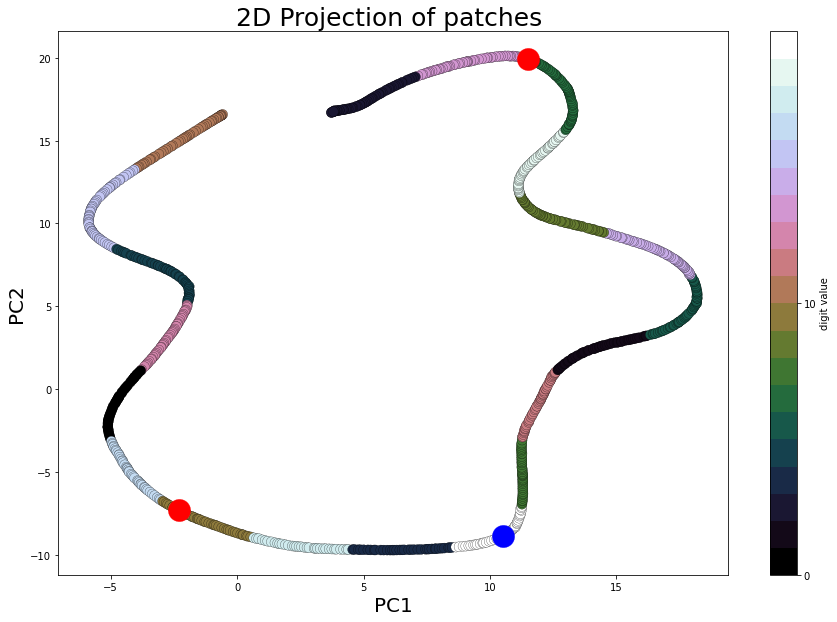

[297.0, 835.0, 422.0]

number left  948


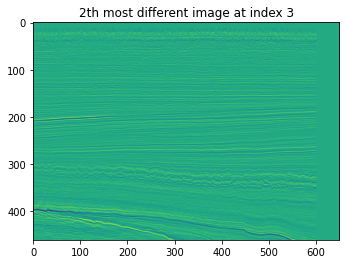

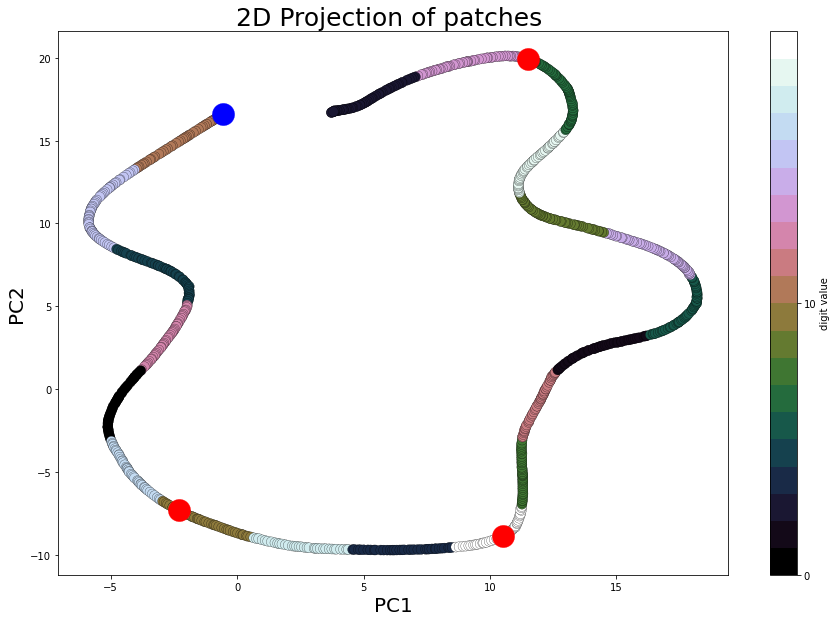

[320.0, 218.0, 195.0, 617.0]

number left  947


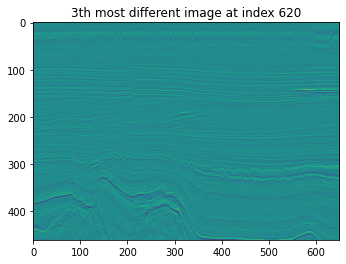

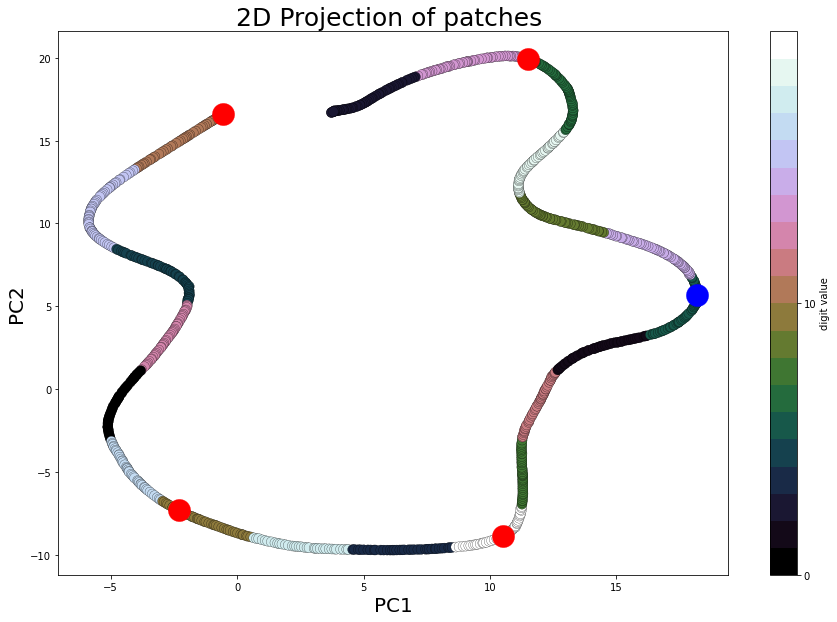

[224.0, 762.0, 349.0, 73.0, 544.0]

number left  946


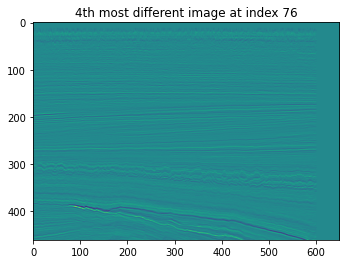

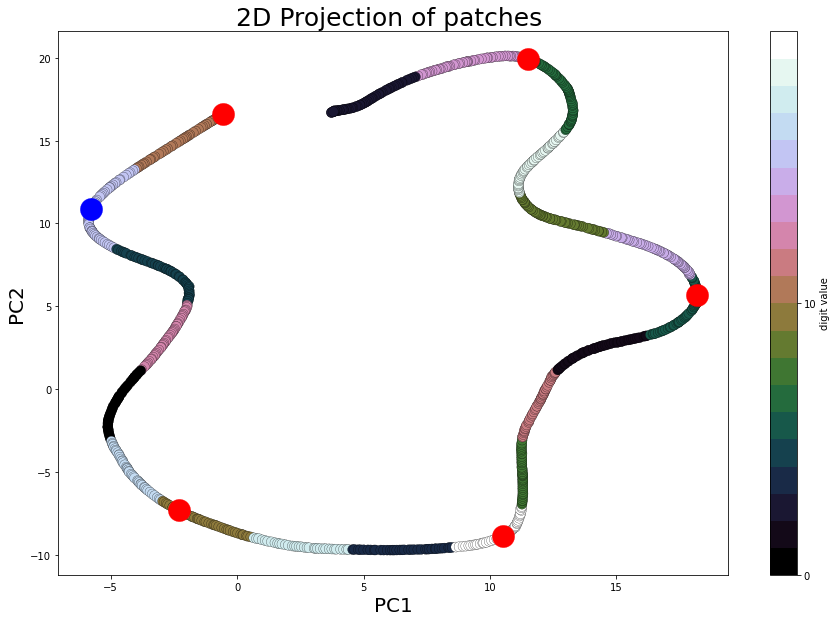

[56.0, 482.0, 69.0, 353.0, 264.0, 280.0]

number left  945


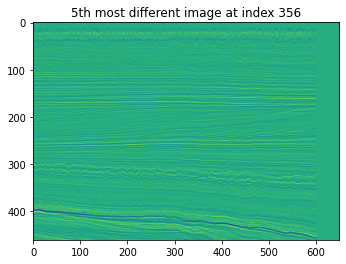

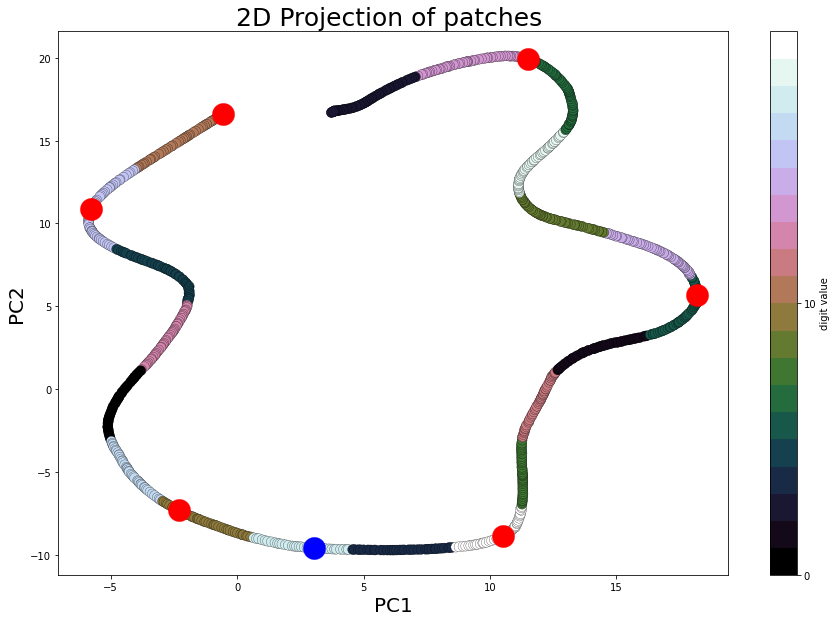

[532.0, 6.0, 407.0, 829.0, 212.0, 756.0, 476.0]

number left  844


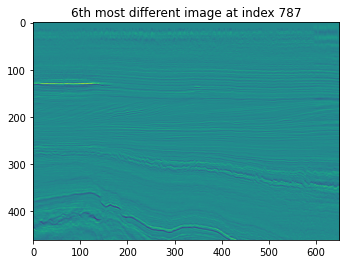

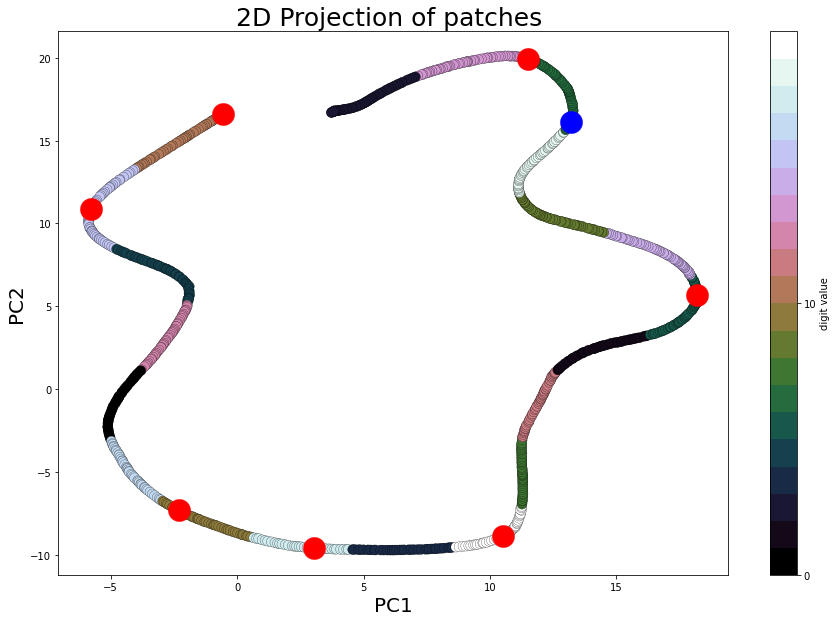

[29.0, 567.0, 154.0, 268.0, 349.0, 195.0, 85.0, 516.0]

number left  803


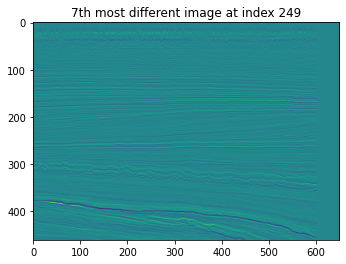

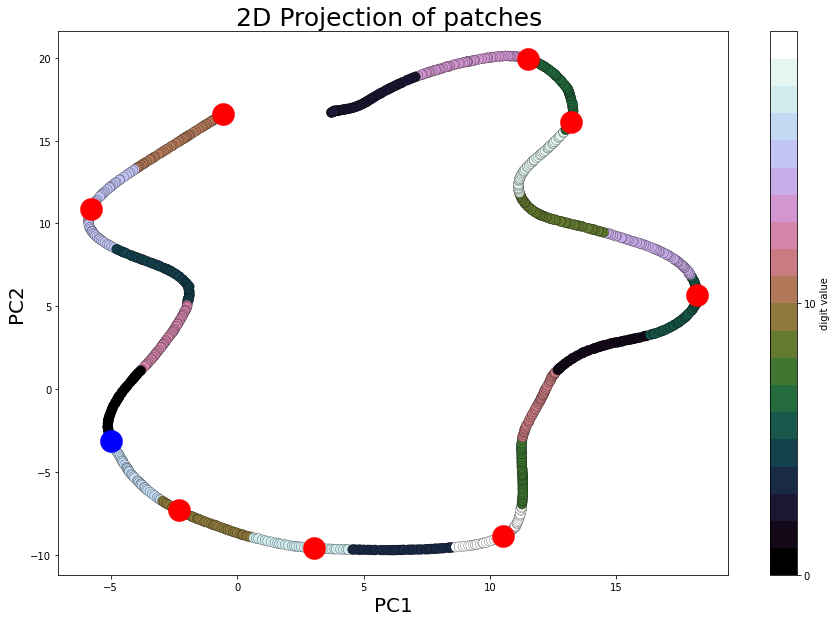

[589.0, 51.0, 464.0, 886.0, 269.0, 813.0, 533.0, 102.0, 640.0]

number left  802


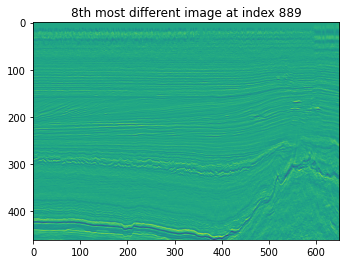

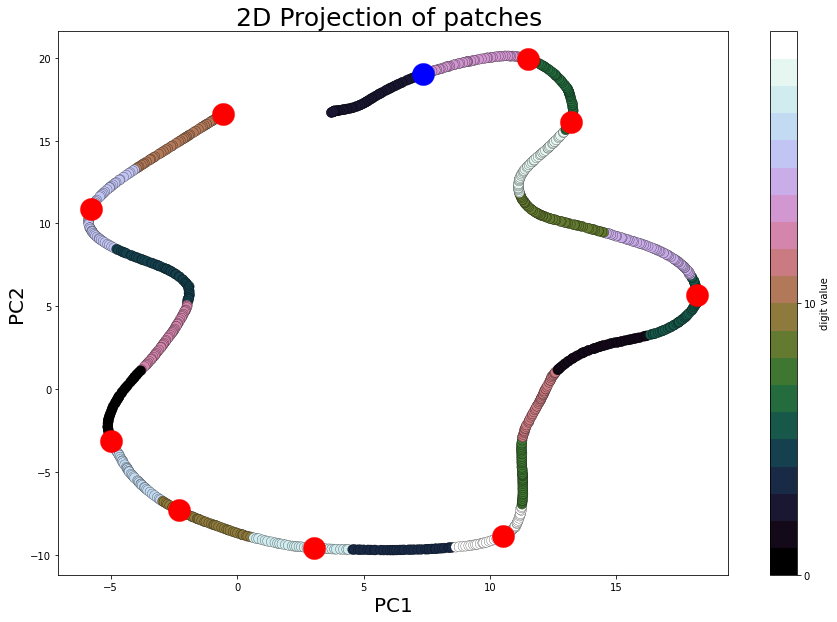

[118.0, 420.0, 7.0, 415.0, 202.0, 342.0, 62.0, 369.0, 169.0, 471.0]

number left  542


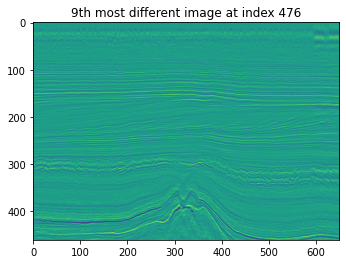

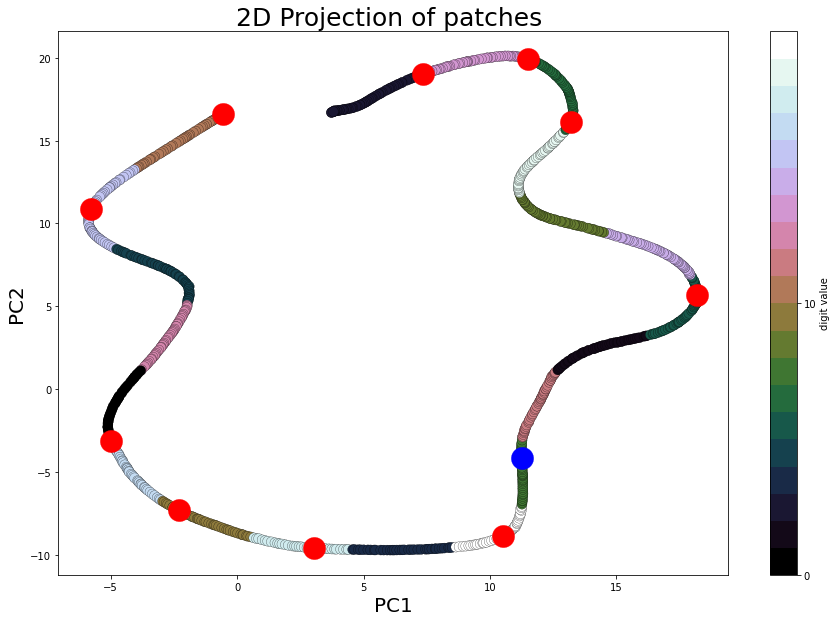

[232.0, 770.0, 357.0, 65.0, 552.0, 8.0, 288.0, 719.0, 181.0, 821.0, 408.0]

number left  339


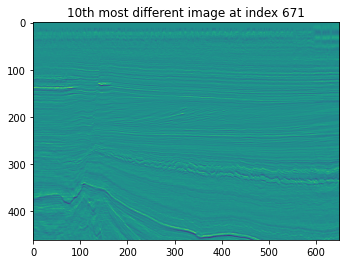

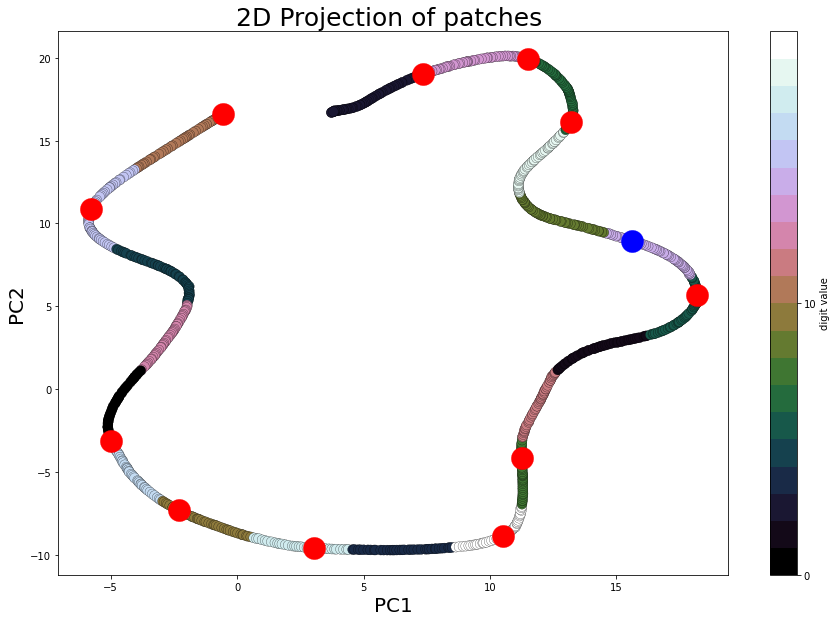

In [16]:
# now we see the indexes of the slices can still be prett close and there is nothing preventing the 10 next slices to be 10* apart.
# Ideally we would find the closest one, remove it from the leist and use it toghet with the previous ref to compute a joint distance
# distance to infer the next slice that is closes to these new points again. 
      
  
direction = "xline"
treshold = 50
# first we group togheter the UMAP and the slice index labels
UMAP_cluster_labels = k_means[direction].labels_
UMAP_index_labels =  np.column_stack((UMAP[direction], UMAP_cluster_labels))
UMAP_index_labels =  np.column_stack((UMAP_index_labels, labels[direction])) 

ref = [UMAP_index_labels[300].tolist()]
print("REF", ref)
print("direction", direction)
print("treshold", treshold)

#print(UMAP[dir][k_means[dir].labels_ == 0, :])
ag = SimilarityImageGenerator(ref, direction, treshold, UMAP_index_labels)
plt.imshow(data[direction][int(ref[0][-1])].reshape(shape[direction][0], shape[direction][1]).T)
plt.title(f'Referance image at index {ref[0][-1]}')
plt.show()
i = 0 
for img in ag:
    next_img = data[direction][int(img[-1])].reshape(shape[direction][0], shape[direction][1]).T
    ref_data = np.asarray(ref)
    ref_imgs = 0
    proj= UMAP[direction]
    proj_labels = k_means[direction].labels_ 
    proj_num_samples = n_clusters
    plot_similar_image(i, int(img[-1]), next_img, ref_imgs, ref_data, proj, proj_labels, proj_num_samples)
    i= i+1
    if i > 10:
        break

    